In [7]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
import sys

# Below paths: bad but managable

# for our_lib
module_path = os.path.abspath(os.path.join('./our_lib')) # or the path to your source code
print(module_path)
sys.path.append(module_path)

# for recsys2025
# module_path = os.path.abspath(os.path.dirname(os.path.abspath(__file__)).join('../../.'))
module_path = os.path.abspath(os.path.join('../.')) # or the path to your source code
sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../recsys2025')) # or the path to your source code
sys.path.append(module_path)


# from our_lib import *
from our_lib import RecSysData
# from our_lib import split_data, create_baseline_embeddings, contest_training
# from our_lib import validate_and_load_embeddings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/zmrocze/studia/uwr/sem2/adm/projekt/src/our_lib


In [1]:
import pandas as pd

# Load the dataframes from parquet files
add_to_cart = pd.read_parquet('../ubc_data/add_to_cart.parquet')
page_visit = pd.read_parquet('../ubc_data/page_visit.parquet')
product_buy = pd.read_parquet('../ubc_data/product_buy.parquet')
product_properties = pd.read_parquet('../ubc_data/product_properties.parquet')
remove_from_cart = pd.read_parquet('../ubc_data/remove_from_cart.parquet')
search_query = pd.read_parquet('../ubc_data/search_query.parquet')

print(f"Add to cart shape: {add_to_cart.shape}")
print(f"Page visit shape: {page_visit.shape}")
print(f"Product buy shape: {product_buy.shape}")
print(f"Product properties shape: {product_properties.shape}")
print(f"Remove from cart shape: {remove_from_cart.shape}")
print(f"Search query shape: {search_query.shape}")
# Display the first few rows of each dataframe
print("\nAdd to cart sample:")
print(add_to_cart.head())
print("\nPage visit sample:")
print(page_visit.head())
print("\nProduct buy sample:")
print(product_buy.head())
print("\nProduct properties sample:")
print(product_properties.head())
print("\nRemove from cart sample:")
print(remove_from_cart.head())
print("\nSearch query sample:")
print(search_query.head())

Add to cart shape: (5235882, 3)
Page visit shape: (150713186, 3)
Product buy shape: (1682296, 3)
Product properties shape: (1197634, 4)
Remove from cart shape: (1697891, 3)
Search query shape: (9571258, 3)

Add to cart sample:
   client_id            timestamp      sku
0   17649961  2022-08-11 12:22:55  1398840
1     315805  2022-09-11 05:34:10  1434568
2     315805  2022-10-06 04:58:15   998226
3   16696114  2022-07-11 16:27:00    81192
4   10238779  2022-10-05 14:36:55  1475246

Page visit sample:
   client_id            timestamp       url
0   13906876  2022-07-13 10:37:45  12160626
1   13906876  2022-08-11 18:13:20   9464384
2    7825390  2022-05-26 10:28:05   3876331
3   13416433  2022-05-25 18:20:10  15017297
4   13416433  2022-06-03 20:03:20  13003066

Product buy sample:
   client_id            timestamp     sku
0   17649961  2022-07-23 20:15:25   18485
1   16696114  2022-07-11 16:31:30   81192
2   10238779  2022-05-29 19:35:40  510014
3   10238779  2022-05-29 19:38:05  510014


In [9]:
full_recsys = RecSysData(
    add_to_cart,
    page_visit,
    product_buy,
    product_properties,
    remove_from_cart,
    search_query
  )

full_recsys

RecSysData(
  add_to_cart=5235882,
  page_visit=150713186,
  product_buy=1682296,
  product_properties=1197634,
  remove_from_cart=1697891,
  search_query=9571258,
  all users: 18889063,
  all products: 1197634
  all urls: 14761060,
)

=== FULL DATASET STATISTICS ===

add_to_cart:
  Total interactions: 5,235,882
  Total users: 1,874,391
  Average interactions per user: 2.79
  Average interactions squared per user: 62.22
  Min interactions per user: 1
  Max interactions per user: 1,731
  Median interactions per user: 1.00
  Std interactions per user: 7.38
  Time range: 2022-05-23 00:10:15 to 2022-10-10 23:59:10
  Unique products: 1,120,342
  Product interactions: 4,067,613
  Average products per user: 2.17
  Average products squared per user: 32.01
  Min products per user: 1
  Max products per user: 1,032
  Median products per user: 1.00
  Std products per user: 5.22

page_visit:
  Total interactions: 150,713,186
  Total users: 18,614,702
  Average interactions per user: 8.10
  Average interactions squared per user: 1874.33
  Min interactions per user: 1
  Max interactions per user: 28,479
  Median interactions per user: 2.00
  Std interactions per user: 42.53
  Time range: 2022-05-23 00:10:00 to 2022-10-10 23:59:59



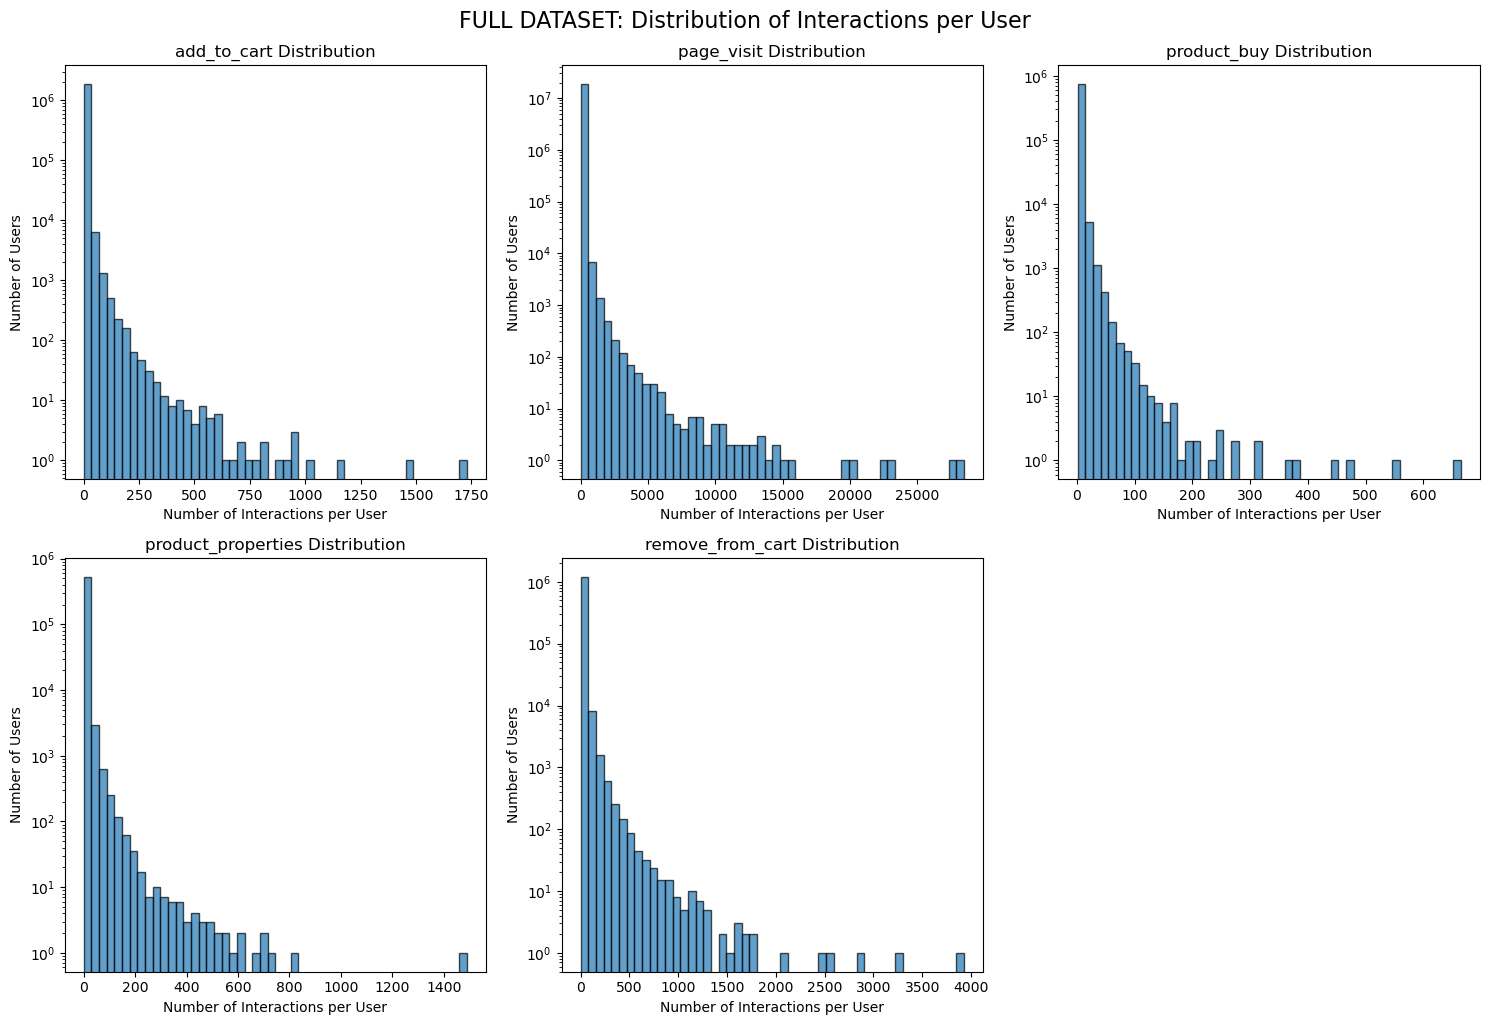

In [10]:
full_recsys.print_datasets_stats_nicely("Full Dataset")

In [11]:
# To take 5% of dataset

import numpy as np

# Take random 5% of all unique users across all datasets
sample_fraction = 0.05
# Get all unique users across all datasets
all_users = full_recsys.all_users_set()
print(f"Total unique users across all datasets: {len(all_users):,}")
all_users = list(all_users)  # Convert to list for sampling

# Sample 5% of all users
np.random.seed(42)  # For reproducibility
sampled_users = np.random.choice(all_users, size=int(len(all_users) * sample_fraction), replace=False)
sampled_users_set = set(sampled_users)

sampled_recsys = full_recsys.sampled_subset(sampled_users)

# sampled_recsys.print_datasets_stats_nicely("Sampled Datasets")

Total unique users across all datasets: 18,889,063


In [ ]:
# to save sampled data
sampled_recsys.save_parquet('../ubc_data_sampled')

In [ ]:
# to take 10% most popular subset

all_users = full_recsys.all_users_set()

def most_popular_users(data, percentage=0.1):
  interaction_datasets = ['add_to_cart', 'product_buy', 'remove_from_cart', 'search_query']
  all_interactions = []
  for dataset_name in interaction_datasets:
    dataset = full_recsys.datasets[dataset_name]
    all_interactions.append(dataset[['client_id']])

  # Concatenate all interactions and count per user
  all_interactions_df = pd.concat(all_interactions, ignore_index=True)
  user_interaction_counts = all_interactions_df.groupby('client_id').size().reset_index(name='total_interactions')

  # Sort users by total interaction count and get top 10%
  user_interaction_counts = user_interaction_counts.sort_values('total_interactions', ascending=False)
  top_10_percent_count = int(len(user_interaction_counts) * percentage)
  top_10_percent_users = user_interaction_counts.head(top_10_percent_count)['client_id'].tolist()

  print(f"Top 10% users with most interactions: {len(top_10_percent_users):,}")
  print(f"Interaction range for top 10%: {user_interaction_counts.iloc[0]['total_interactions']} to {user_interaction_counts.iloc[top_10_percent_count-1]['total_interactions']}")
  return top_10_percent_users

top_10_percent_users = most_popular_users(full_recsys, percentage=0.01)
# Create a new RecSysData instance with only the top 10% users
top_10_percent_recsys = full_recsys.sampled_subset(top_10_percent_users)
top_10_percent_recsys

In [12]:
unique_page_visits = full_recsys.page_visit.groupby('client_id')['url'].nunique()
print(f"  Average unique page visits per user: {unique_page_visits.mean():.2f}")
print(f"  Total unique page visits {unique_page_visits.sum()}")
print(f"  Average unique page visits squared per user: {(unique_page_visits ** 2).mean():.2f}")
print(f"  Max unique page visits per user: {unique_page_visits.max():,}")
print(f"  Median unique page visits per user: {unique_page_visits.median():.2f}")
print(f"  Std unique page visits per user: {unique_page_visits.std():.2f}")

  Average unique page visits per user: 3.79
  Total unique page visits 70636524
  Average unique page visits squared per user: 170.36
  Max unique page visits per user: 9,292
  Median unique page visits per user: 1.00
  Std unique page visits per user: 12.49


In [ ]:
# Summary of some sizes:

# Note:
# 
# number of interactions
# add_to_cart:
# 5_235_882
# buy_product:
# 1_682_296
# remove_from_cart:
# 1_697_891
# search_query:
# 9_571_258
# page_visit:
# 150_713_186

# number of unique interactions (about 80%)
# add_to_cart:
# 4_067_613
# buy_product:
# 1_361_976
# remove_from_cart:
# 1_361_592
# search_query:
# __
# page_visit (50% !!!):
# 70_636_524

# sum of squares of interaction counts (cost of attention)
# add_to_cart:
# >>> 1_900_000 * 62
# 117_800_000
# buy_product:
# >>> 750_860 * 19 
# 14_266_340
# remove_from_cart:
# >>> 530_000 * 75
# 39_750_000
# search_query:
# >>> 1_200_000 * 510
# 612_000_000
# >>> 18_000_000*1874
# 33_732_000_000

# sum of squares of interaction counts without repetition:
# add_to_cart:
# >>> 1874391 * 32
# 59_980_512
# buy_product:
# >>> 750860 * 11
# 8_259_460
# remove_from_cart:
# >>> 536626 * 49
# 26_294_674
# search_query:
# __
# page_visit:
# >>> 18_000_000 * 170
# 3_164_499_340


In [13]:
import numpy as np

# Load the relevant users from the numpy file
relevant_users = np.load('../ubc_data/input/relevant_clients.npy')

# Count the relevant users
relevant_users_count = len(relevant_users)

print(f"Number of relevant users: {relevant_users_count:,}")
print(f"Type: {type(relevant_users)}")
print(f"Data type: {relevant_users.dtype}")
print(f"Shape: {relevant_users.shape}")

# Show first few relevant user IDs
print(f"\nFirst 10 relevant users: {relevant_users[:10]}")

# Check if these users exist in our datasets
relevant_users_set = set(relevant_users)
overlap_with_all_users = len(relevant_users_set.intersection(all_users))
print(f"Percentage of relevant users in our data: {(overlap_with_all_users / relevant_users_count) * 100:.2f}%")

print(f"But still all_users in database counts {len(all_users):,} users")

Number of relevant users: 1,000,000
Type: <class 'numpy.ndarray'>
Data type: int64
Shape: (1000000,)

First 10 relevant users: [ 5963217 17797869 18408314 12045388 20673586  7663245 12227114 23087838
   778845  4709280]
Percentage of relevant users in our data: 100.00%
But still all_users in database counts 18,889,063 users


In [14]:
relevant_users_data = full_recsys.sampled_subset(relevant_users_set, reset_index=False)
relevant_users_data

RecSysData(
  add_to_cart=2654264,
  page_visit=41919050,
  product_buy=1218423,
  product_properties=831550,
  remove_from_cart=1138370,
  search_query=4212745,
  all users: 1000000,
  all products: 831550
  all urls: 6171078,
)

=== RELEVANT USERS DATASET STATISTICS ===

add_to_cart:
  Total interactions: 2,654,264
  Total users: 612,544
  Average interactions per user: 4.33
  Average interactions squared per user: 147.78
  Min interactions per user: 1
  Max interactions per user: 1,731
  Median interactions per user: 2.00
  Std interactions per user: 11.36
  Time range: 2022-05-23 00:10:15 to 2022-10-10 23:59:10
  Unique products: 716,619
  Product interactions: 1,944,294
  Average products per user: 3.17
  Average products squared per user: 74.39
  Min products per user: 1
  Max products per user: 1,032
  Median products per user: 1.00
  Std products per user: 8.02

page_visit:
  Total interactions: 41,919,050
  Total users: 844,923
  Average interactions per user: 49.61
  Average interactions squared per user: 24774.94
  Min interactions per user: 1
  Max interactions per user: 22,879
  Median interactions per user: 18.00
  Std interactions per user: 149.38
  Time range: 2022-05-23 00:10:05 to 2022-10-10 23

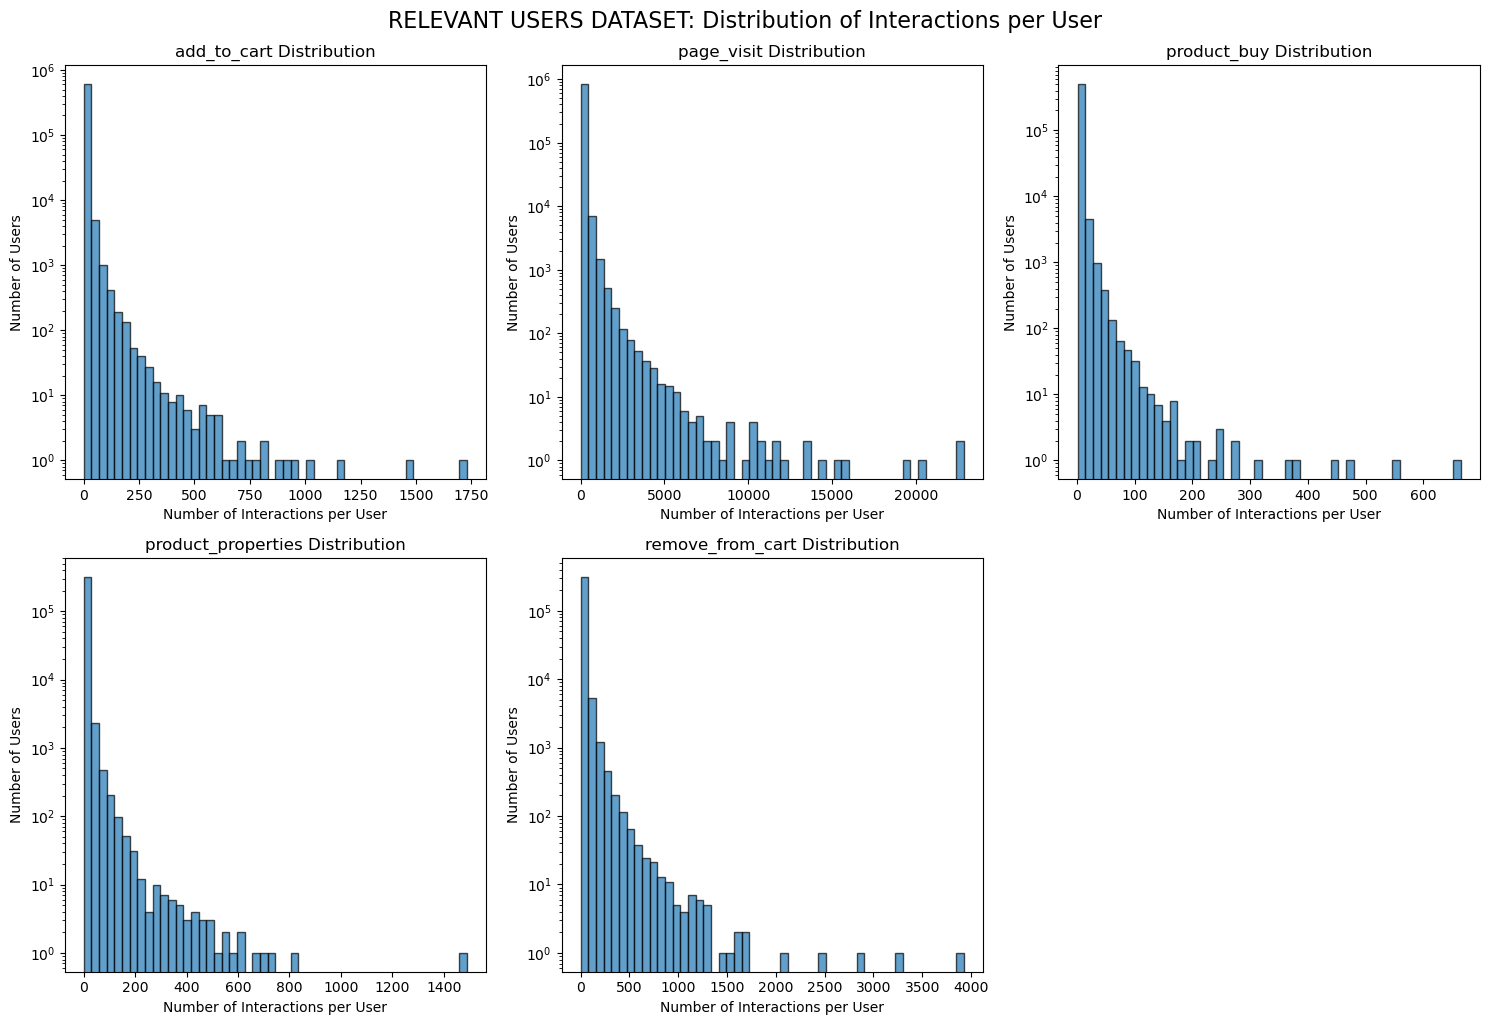

In [15]:
relevant_users_data.print_datasets_stats_nicely("Relevant Users Dataset")